In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [2]:
from google.colab import files
uploaded=files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata.xlsx


In [3]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [4]:
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [5]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


#Data Visualisation


<Axes: xlabel='Quarter', ylabel='Sales'>

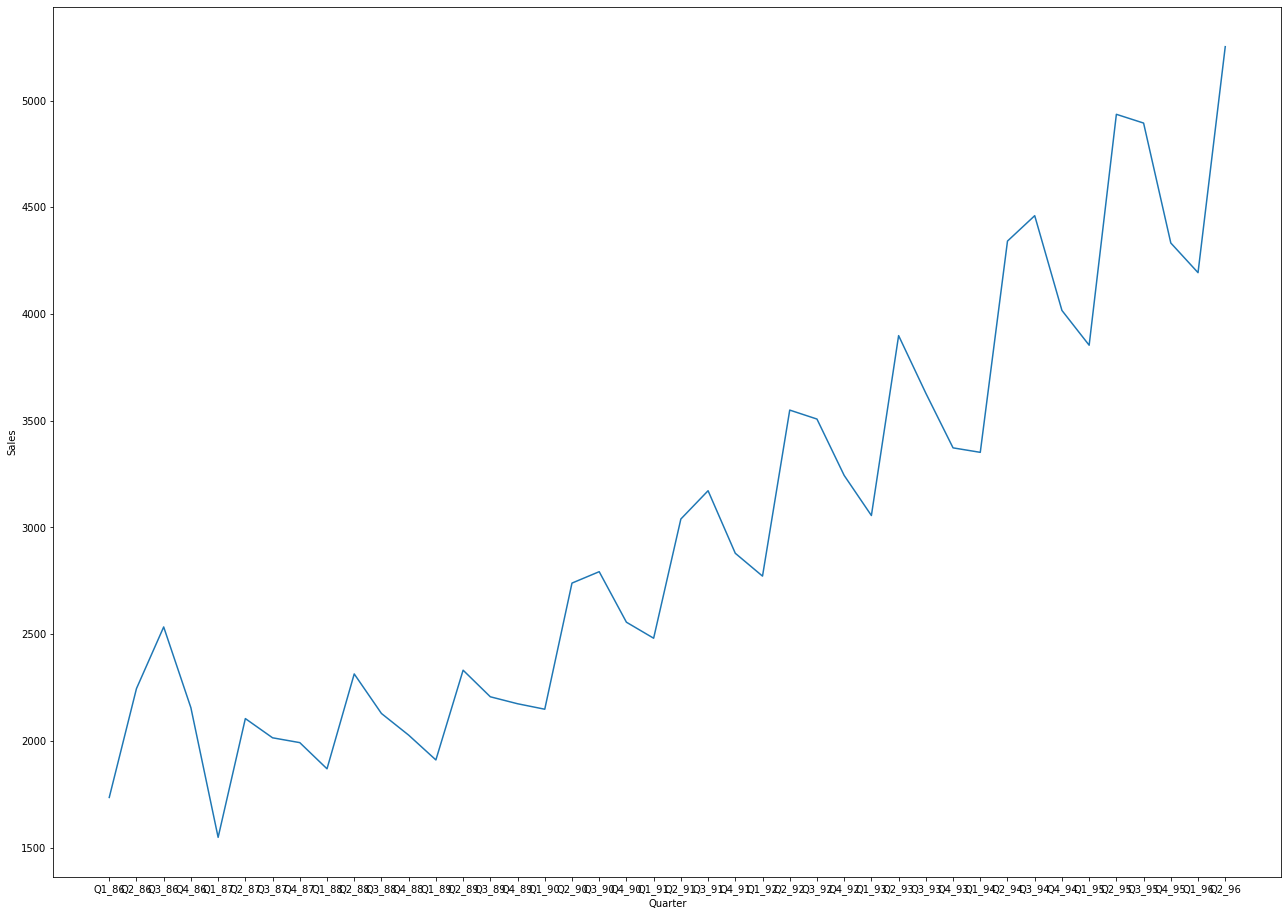

In [6]:
plt.figure(figsize=(22,16))
sns.lineplot(x="Quarter",y="Sales",data=data)

#Box plot

<Axes: >

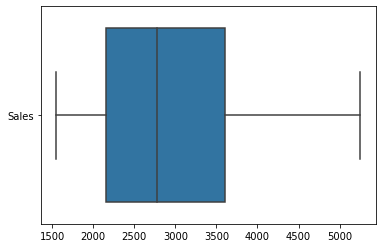

In [8]:
sns.boxplot(data=data, orient="h")

#Histogram

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

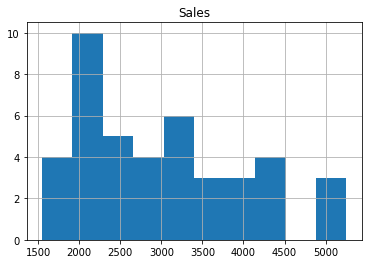

In [9]:
data.hist()

#Density plot

<Axes: ylabel='Density'>

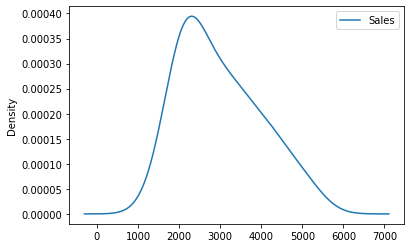

In [10]:
data.plot(kind='kde')

#Moving Average

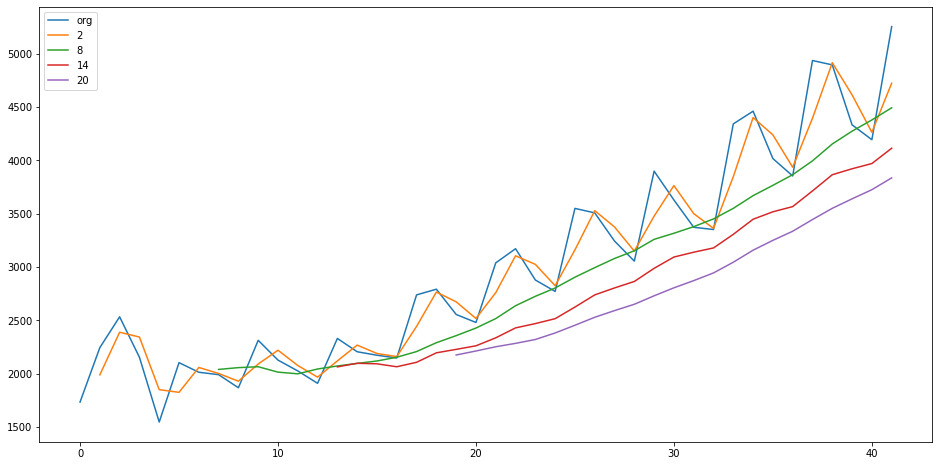

In [11]:
plt.figure(figsize=(16,8))
data.Sales.plot(label="org")
for i in range(2,24,6):
    data['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

#Time series decomposition plot

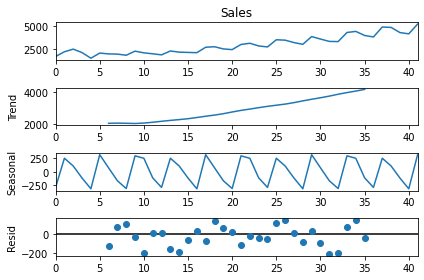

In [12]:
decompose_ts_add = seasonal_decompose(data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

#ACF plots and PACF plots

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


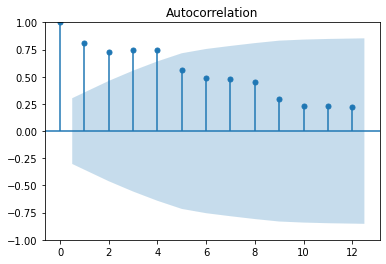

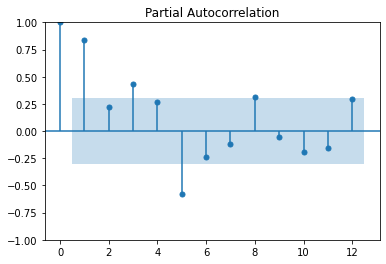

In [13]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales,lags=12)
tsa_plots.plot_pacf(data.Sales,lags=12)
plt.show()

#Data Splitting

In [14]:
data.count()

Quarter    42
Sales      42
dtype: int64

In [15]:
train = data.head(30)
test = data.tail(12)

#Evaluation Metric MAPE

In [16]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

#Simple Exponential Method

In [17]:
ses_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Sales) 

22.046763337847036

#Holt method

In [18]:
hw_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Sales) 

<ipython-input-18-6d1180ef4197>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


11.213841942210799

#Holts winter exponential smoothing with additive seasonality and additive trend


In [19]:
hwe_model_add_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Sales) 

5.537258097335431

#Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [20]:
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Sales) 

7.532113536522466

#Final Model by combining train and test

In [21]:
hwe_model_mul_add = ExponentialSmoothing(data["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()

#Forecasting next 10

In [22]:
hwe_model_mul_add.forecast(10)

42    5012.147440
43    4645.260903
44    4490.053377
45    5638.551712
46    5671.720685
47    5107.131442
48    4834.680254
49    6127.684114
50    6109.530409
51    5503.868389
dtype: float64

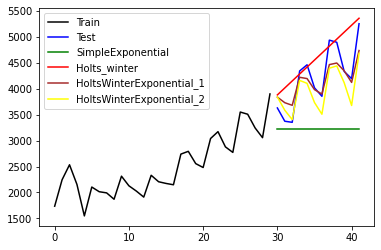

In [23]:
plt.plot(train.index, train["Sales"], label='Train',color="black")
plt.plot(test.index, test["Sales"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')